In [1]:
!python --version

Python 3.10.9


In [2]:
import ipywidgets        as widgets
import matplotlib.pyplot as plt
import numpy             as np
import os

# Experimental data

A significant part of the project is based on experimental data. The same post-treatment apply on both numerical simulation made with ADELI and on images obtained empirically. So it is a second entry point before running the post-processing procedure. For instance, a typical file of such data is stored here.

In [3]:
basepath  = os.path.join("C:\\Users", "julie", "Documents")
expfolder = "experiences"
fieldpath   = os.path.join(basepath, expfolder, "S18_Eyy_point679.csv")

# Reading the file

In [4]:
field = np.genfromtxt( fieldpath, delimiter=',' )

print(f"shape : {field.shape}")
print(f"type  : {field.dtype}")
print(f"NaN   : {np.any(np.isnan(field))}")
print(f"min   : {np.nanmin(field)}")
print(f"max   : {np.nanmax(field)}")
print(f"mean  : {np.nanmean(field)}")
print(f"std   : {np.nanstd(field)}")

shape : (1551, 211)
type  : float64
NaN   : True
min   : -0.00422234079063837
max   : 0.14902287963103
mean  : 0.009779571056074209
std   : 0.016349865239292535


# Exploration

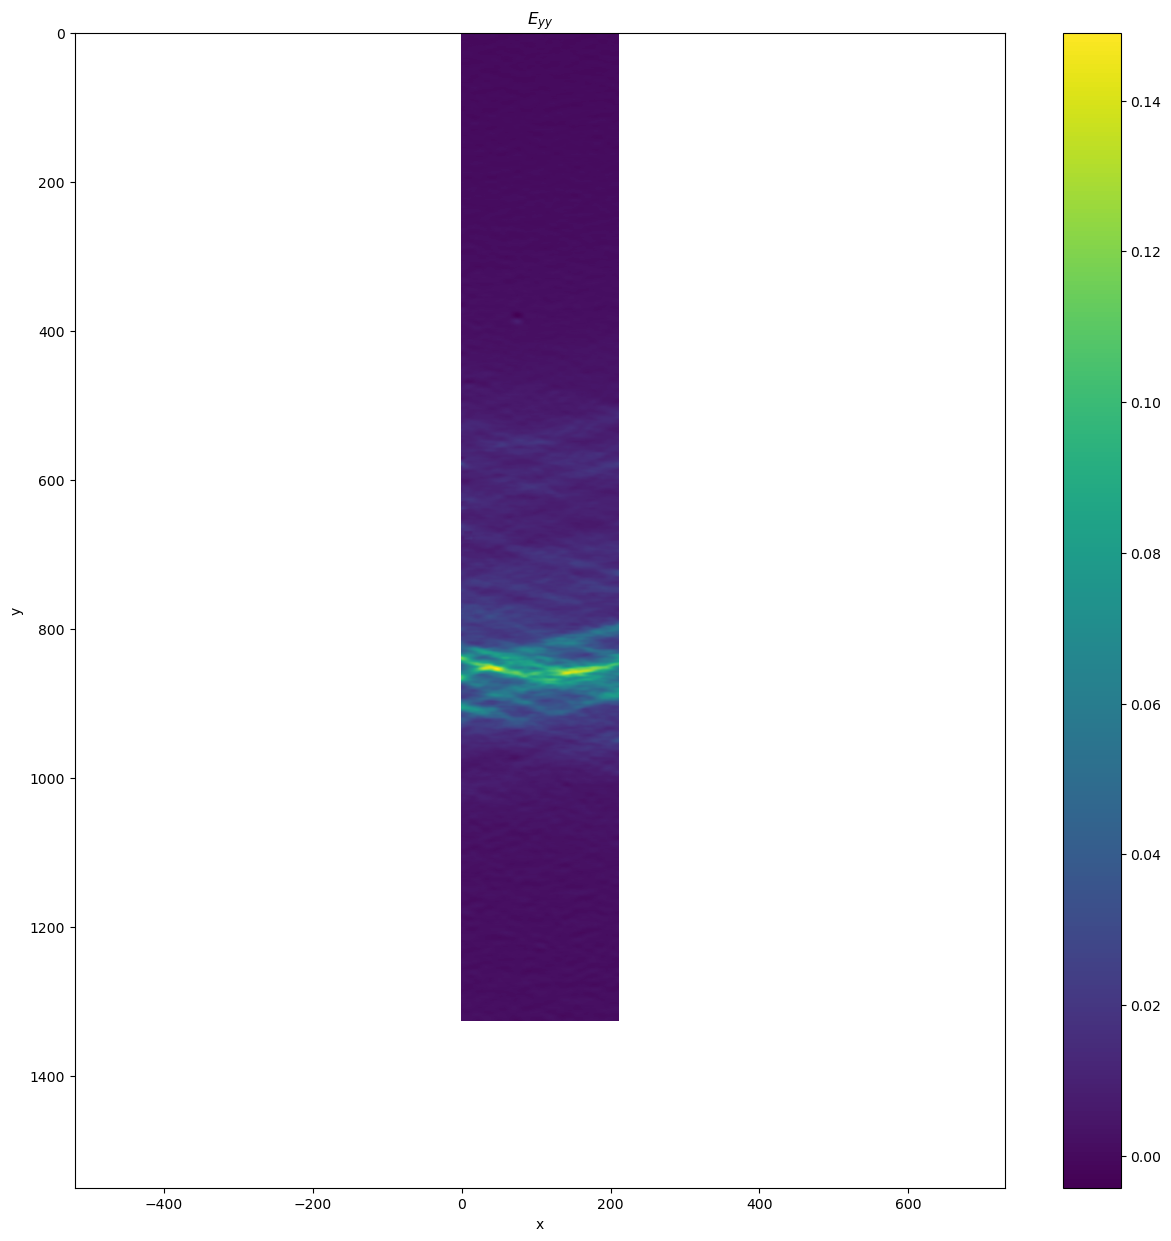

In [5]:
plt.figure(figsize=(15,15))
plt.imshow(field)
plt.axis('equal')
plt.colorbar()
plt.title("$E_{yy}$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Cleaning data

We explore two ways to clean the data :

- `clean0` : get rid of NaNs, the last lines,
- `clean1` : filling NaNs with the mean value of the field

In [6]:
clean0 = field[np.logical_not(np.isnan(field).any(axis=1))]

print(f"shape : {clean0.shape}")
print(f"type  : {clean0.dtype}")
print(f"NaN   : {np.any(np.isnan(clean0))}")
print(f"min   : {np.nanmin(clean0)}")
print(f"max   : {np.nanmax(clean0)}")
print(f"mean  : {np.nanmean(clean0)}")
print(f"std   : {np.nanstd(clean0)}")

shape : (1328, 211)
type  : float64
NaN   : False
min   : -0.00422234079063837
max   : 0.14902287963103
mean  : 0.009779571056074209
std   : 0.016349865239292535


In [7]:
clean1 = np.nan_to_num(field, np.nanmean(field))

print(f"shape : {clean1.shape}")
print(f"type  : {clean1.dtype}")
print(f"NaN   : {np.any(np.isnan(clean1))}")
print(f"min   : {np.nanmin(clean1)}")
print(f"max   : {np.nanmax(clean1)}")
print(f"mean  : {np.nanmean(clean1)}")
print(f"std   : {np.nanstd(clean1)}")

shape : (1551, 211)
type  : float64
NaN   : False
min   : -0.00422234079063837
max   : 0.14902287963103
mean  : 0.008373481858456834
std   : 0.015513137639065817


Let visualise them all.

original shape : (1551, 211)
clean0 shape   : (1328, 211)
clean1 shape   : (1551, 211)


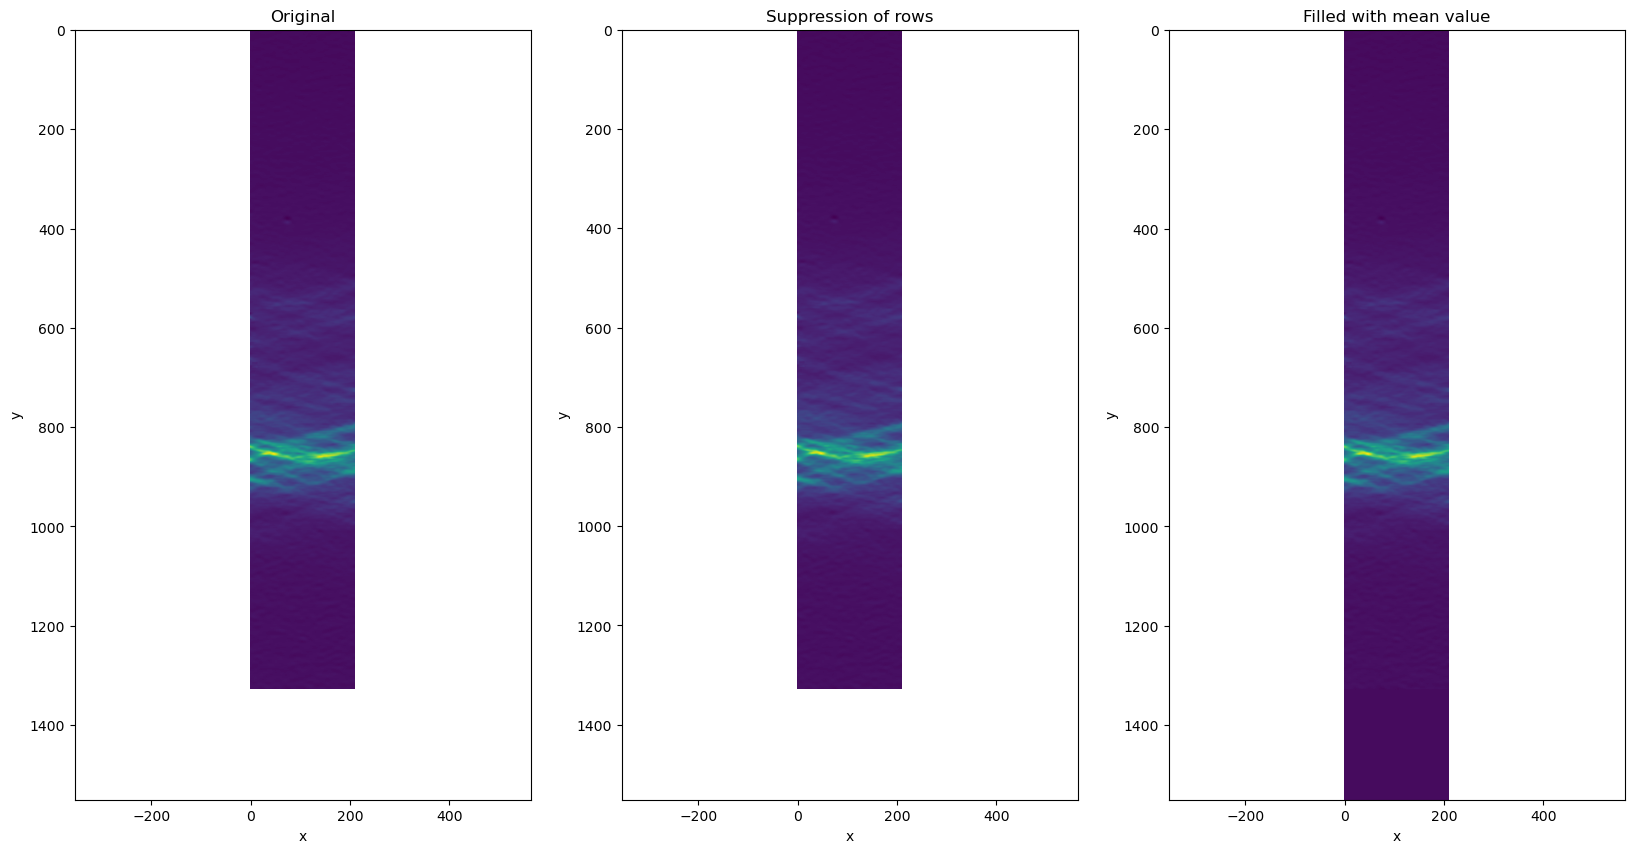

In [8]:
print(f"original shape : {field.shape}")
print(f"clean0 shape   : {clean0.shape}")
print(f"clean1 shape   : {clean1.shape}")

fig = plt.figure(figsize=(20, 10))

axe = fig.add_subplot(1, 3, 1)
axe.imshow(field)
axe.axis('equal')
axe.set_xlabel("x")
axe.set_ylabel("y")
axe.set_title("Original")

axe = fig.add_subplot(1, 3, 2)
axe.imshow(clean0)
axe.axis('equal')
axe.set_xlabel("x")
axe.set_ylabel("y")
axe.set_ylim((field.shape[0], 0))
axe.set_title("Suppression of rows")

axe = fig.add_subplot(1, 3, 3)
axe.imshow(clean1)
axe.axis('equal')
axe.set_xlabel("x")
axe.set_ylabel("y")
axe.set_title("Filled with mean value")

plt.show()

In the first : data exist but is NaN, in the second, data does not exist.

# Padding up to a square with the mean value

In [9]:
meanval = np.nanmean(field)

## Padding `clean0` : `pclean0`

In [10]:
l = min(clean1.shape)
N = max(clean0.shape)

pclean0 = np.ones((N,N), dtype=np.float64) *meanval
pclean0[:, (N-l)//2:(N+l)//2] = clean0

## Padding `clean1` : `pclean1`

In [11]:
l = min(clean1.shape)
N = max(clean1.shape)

pclean1 = np.ones((N,N), dtype=np.float64) *meanval
pclean1[:, (N-l)//2:(N+l)//2] = clean1

## Visualisation

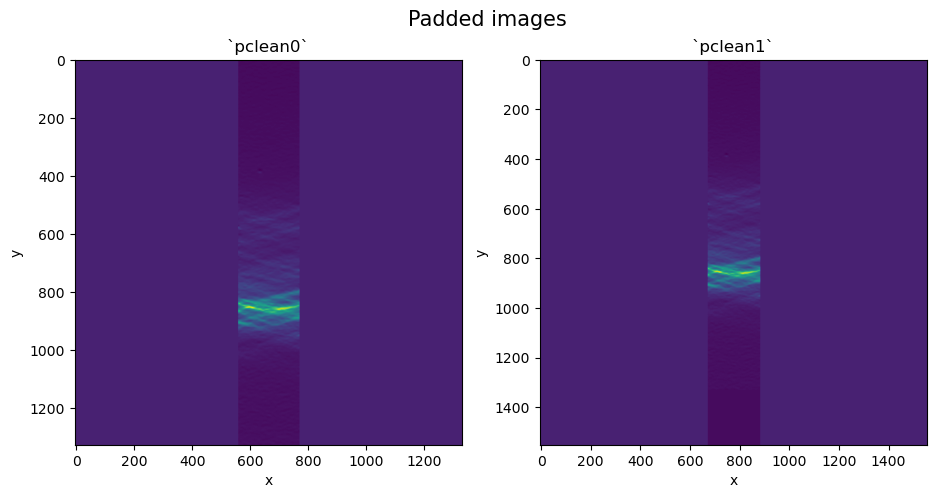

In [12]:
fig = plt.figure(figsize=(11,5))

axe = fig.add_subplot(1, 2, 1)
axe.imshow(pclean0)
axe.axis('equal')
axe.set_xlabel("x")
axe.set_ylabel("y")
axe.set_title("`pclean0`")

axe = fig.add_subplot(1, 2, 2)
g = axe.imshow(pclean1)
axe.axis('equal')
axe.set_xlabel("x")
axe.set_ylabel("y")
axe.set_title("`pclean1`")

plt.suptitle("Padded images", fontsize=15)
plt.show()

# Autocorrelation via *Fast Fourier Transform* algorithm

In [13]:
def autocorrelation(img: np.ndarray) -> np.ndarray:
    
    img_ = np.fft.fft2(img)
    img_ = np.power(np.abs(img_), 2)
    img_ = np.fft.ifft2(img_)
    img_ = np.abs(np.fft.fftshift(img_)/np.nanmax(img_))

    return img_

In [14]:
auto0 = autocorrelation(pclean0)

print(f"shape : {auto0.shape}")
print(f"NaN   : {np.any(np.isnan(auto0))}")

shape : (1328, 1328)
NaN   : False


In [15]:
auto1 = autocorrelation(pclean1)

print(f"shape : {auto1.shape}")
print(f"NaN   : {np.any(np.isnan(auto1))}")

shape : (1551, 1551)
NaN   : False


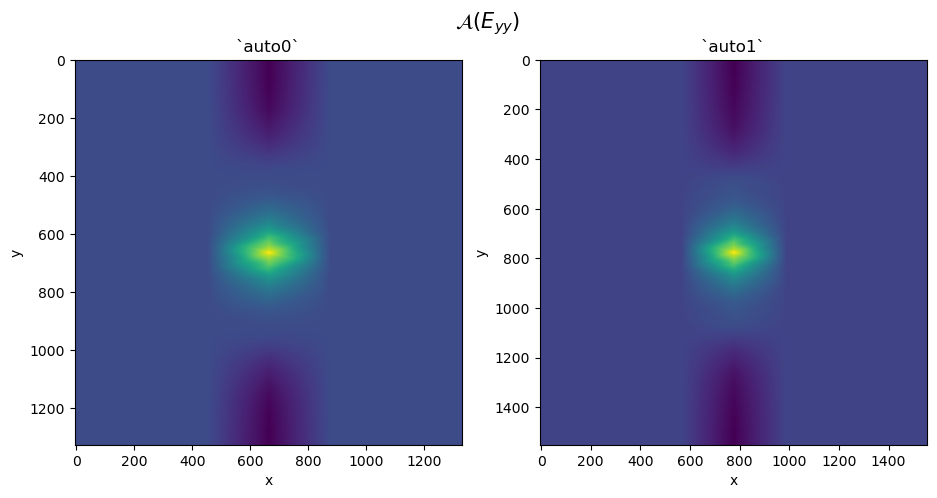

In [16]:
fig = plt.figure(figsize=(11,5))

axe = fig.add_subplot(1, 2, 1)
axe.imshow(auto0)
axe.axis('equal')
axe.set_xlabel("x")
axe.set_ylabel("y")
axe.set_title("`auto0`")

axe = fig.add_subplot(1, 2, 2)
g = axe.imshow(auto1)
axe.axis('equal')
axe.set_xlabel("x")
axe.set_ylabel("y")
axe.set_title("`auto1`")

plt.suptitle("$\mathcal{A}(E_{yy})$", fontsize=15)
plt.show()

# Computing $C_{\infty}$

In [17]:
cinf0 = (1 +(np.power(meanval, 2) /np.power(auto0, 2).mean())) /2.
cinf1 = (1 +(np.power(meanval, 2) /np.power(auto1, 2).mean())) /2.

print( "              `auto0` \t\t `auto1`")
print(f"C_inf : {cinf0} ; {cinf1}")

              `auto0` 		 `auto1`
C_inf : 0.5000995184543467 ; 0.50008817953247


Padding with the mean value is too important. That should be why $C_\infty$ is so close to $\frac{1}{2}$.

C:\Users\julie\AppData\Local\Temp\ipykernel_8852\3263162972.py:5: UserWarning: No contour levels were found within the data range.
  axe.contour(auto0, [cinf0, 1.0])
C:\Users\julie\AppData\Local\Temp\ipykernel_8852\3263162972.py:12: UserWarning: No contour levels were found within the data range.
  axe.contour(auto1, [cinf1, 1.0])


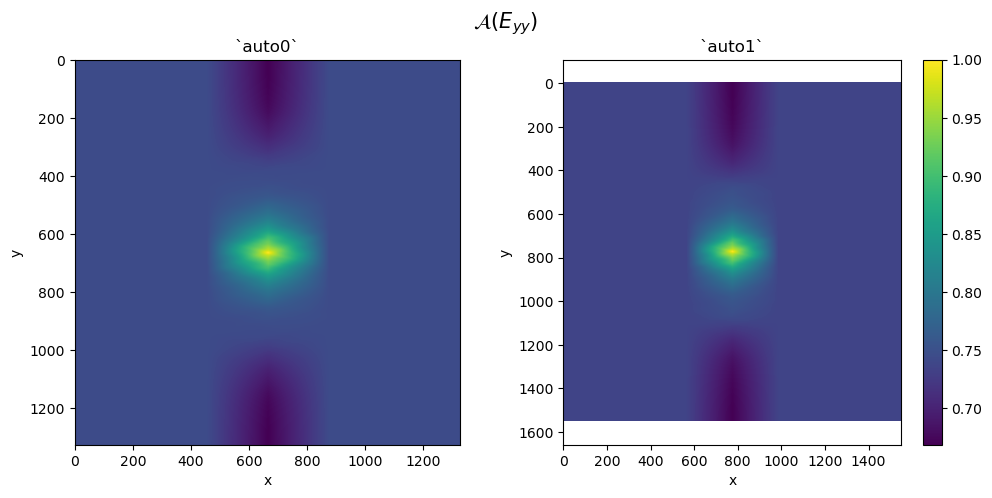

In [18]:
fig = plt.figure(figsize=(12,5))

axe = fig.add_subplot(1, 2, 1)
axe.imshow(auto0)
axe.contour(auto0, [cinf0, 1.0])
axe.set_xlabel("x")
axe.set_ylabel("y")
axe.set_title("`auto0`")

axe = fig.add_subplot(1, 2, 2)
g = axe.imshow(auto1)
axe.contour(auto1, [cinf1, 1.0])
axe.axis("equal")
axe.set_xlabel("x")
axe.set_ylabel("y")
axe.set_title("`auto1`")

plt.colorbar(g)
plt.suptitle("$\mathcal{A}(E_{yy})$", fontsize=15)
plt.show()

# $C_\infty$ as a free parameter

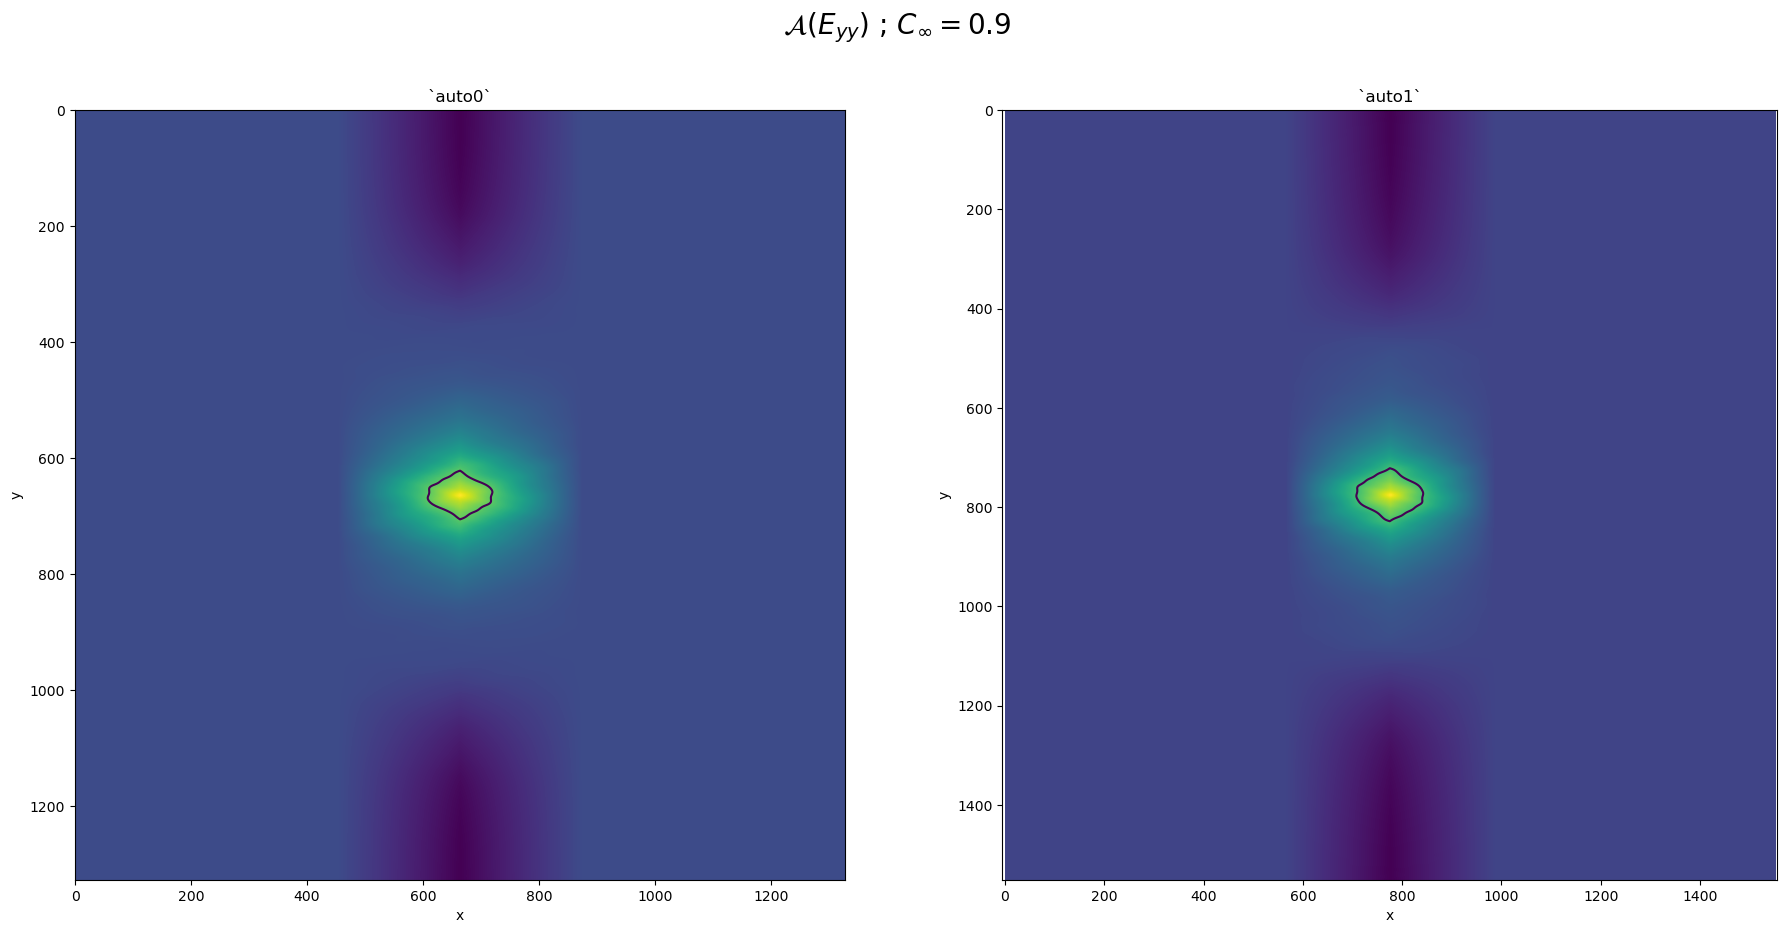

In [26]:
fcinf = 0.9

fig = plt.figure(figsize=(22,10))

axe = fig.add_subplot(1, 2, 1)
axe.imshow(auto0)
axe.contour(auto0, [fcinf, 1.0])
axe.set_xlabel("x")
axe.set_ylabel("y")
axe.set_title("`auto0`")

axe = fig.add_subplot(1, 2, 2)
g = axe.imshow(auto1)
axe.contour(auto1, [fcinf, 1.0])
axe.axis("equal")
axe.set_xlabel("x")
axe.set_ylabel("y")
axe.set_title("`auto1`")

plt.suptitle("$\mathcal{A}(E_{yy})$ ; $C_\infty =$"+str(fcinf), fontsize=20)
plt.show()

Let see what is the influence of $C_\infty$ on the contour.

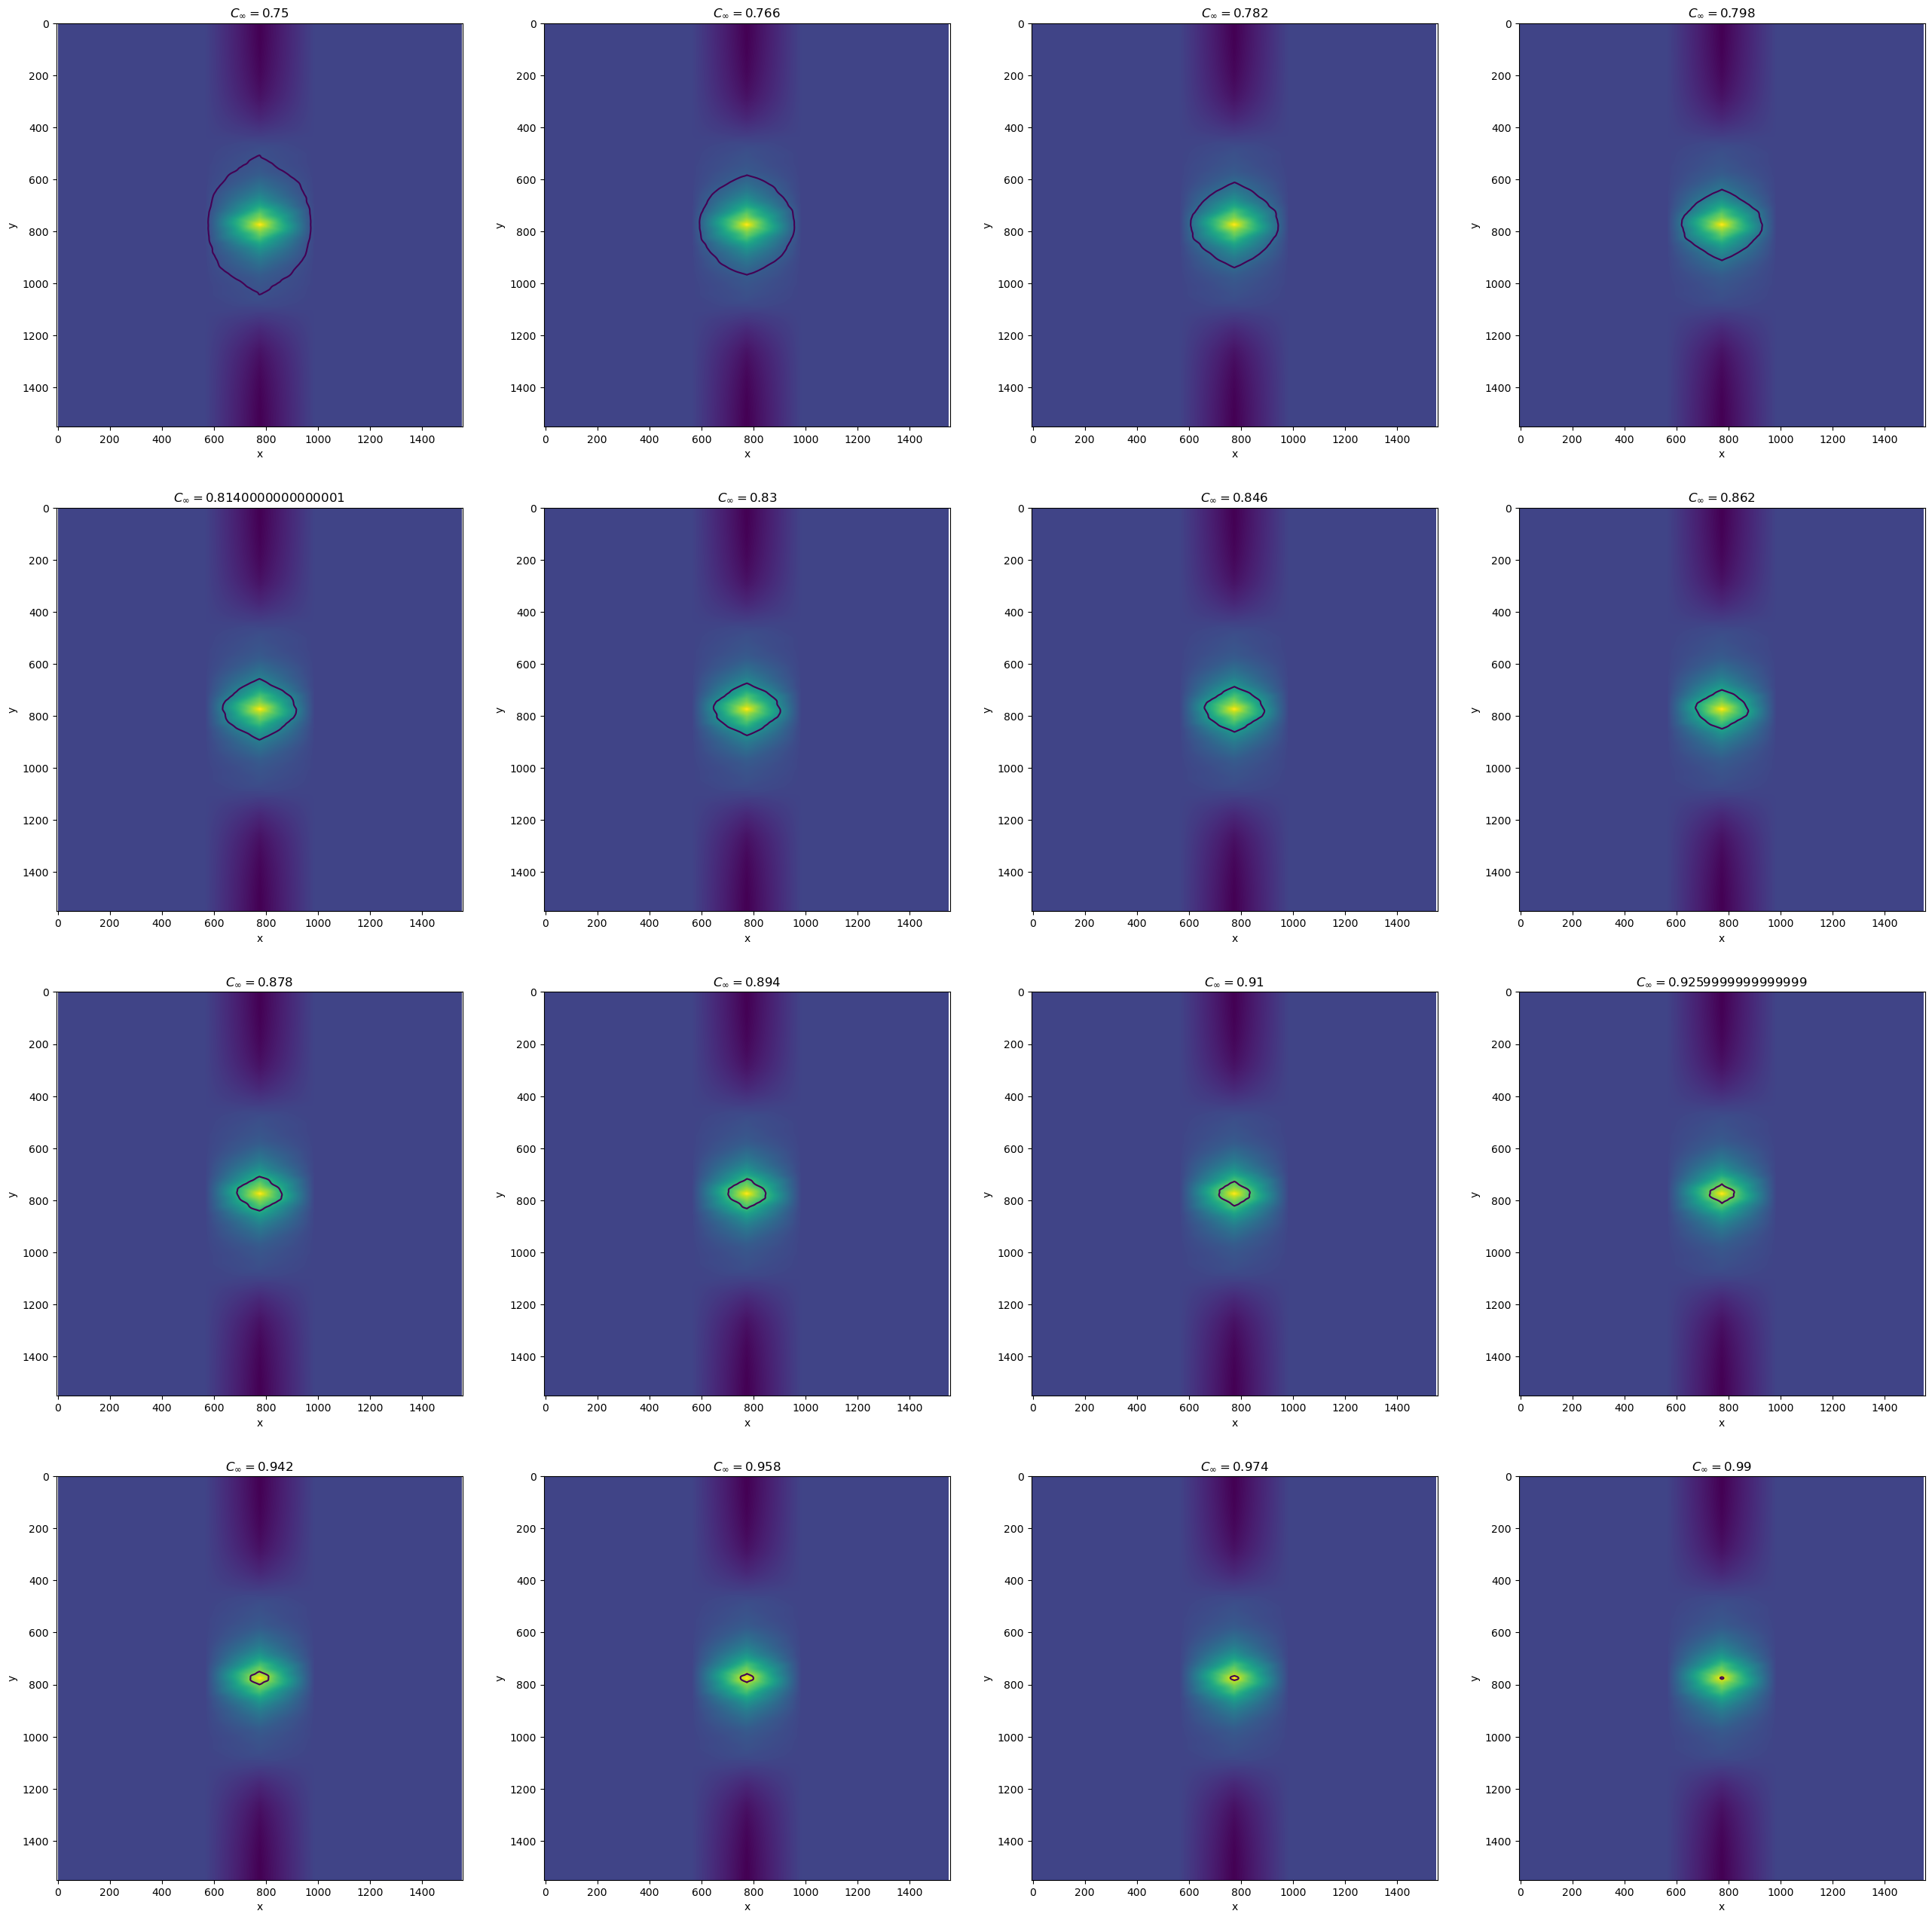

In [31]:
fcinf = np.linspace(0.75, 0.99, 16, endpoint=True)

fig = plt.figure(figsize=(32,32))

for i in range(4):
    for j in range(4):
        axe = fig.add_subplot(4, 4, 4*i+j+1)
        axe.imshow(auto1)
        axe.contour(auto1, [fcinf[4*i+j], 1.0])
        axe.axis("equal")
        axe.set_xlabel("x")
        axe.set_ylabel("y")
        axe.set_title("$C_\infty =$"+str(fcinf[4*i+j]))

Let zoom in for the $C_\infty = 0.99$.

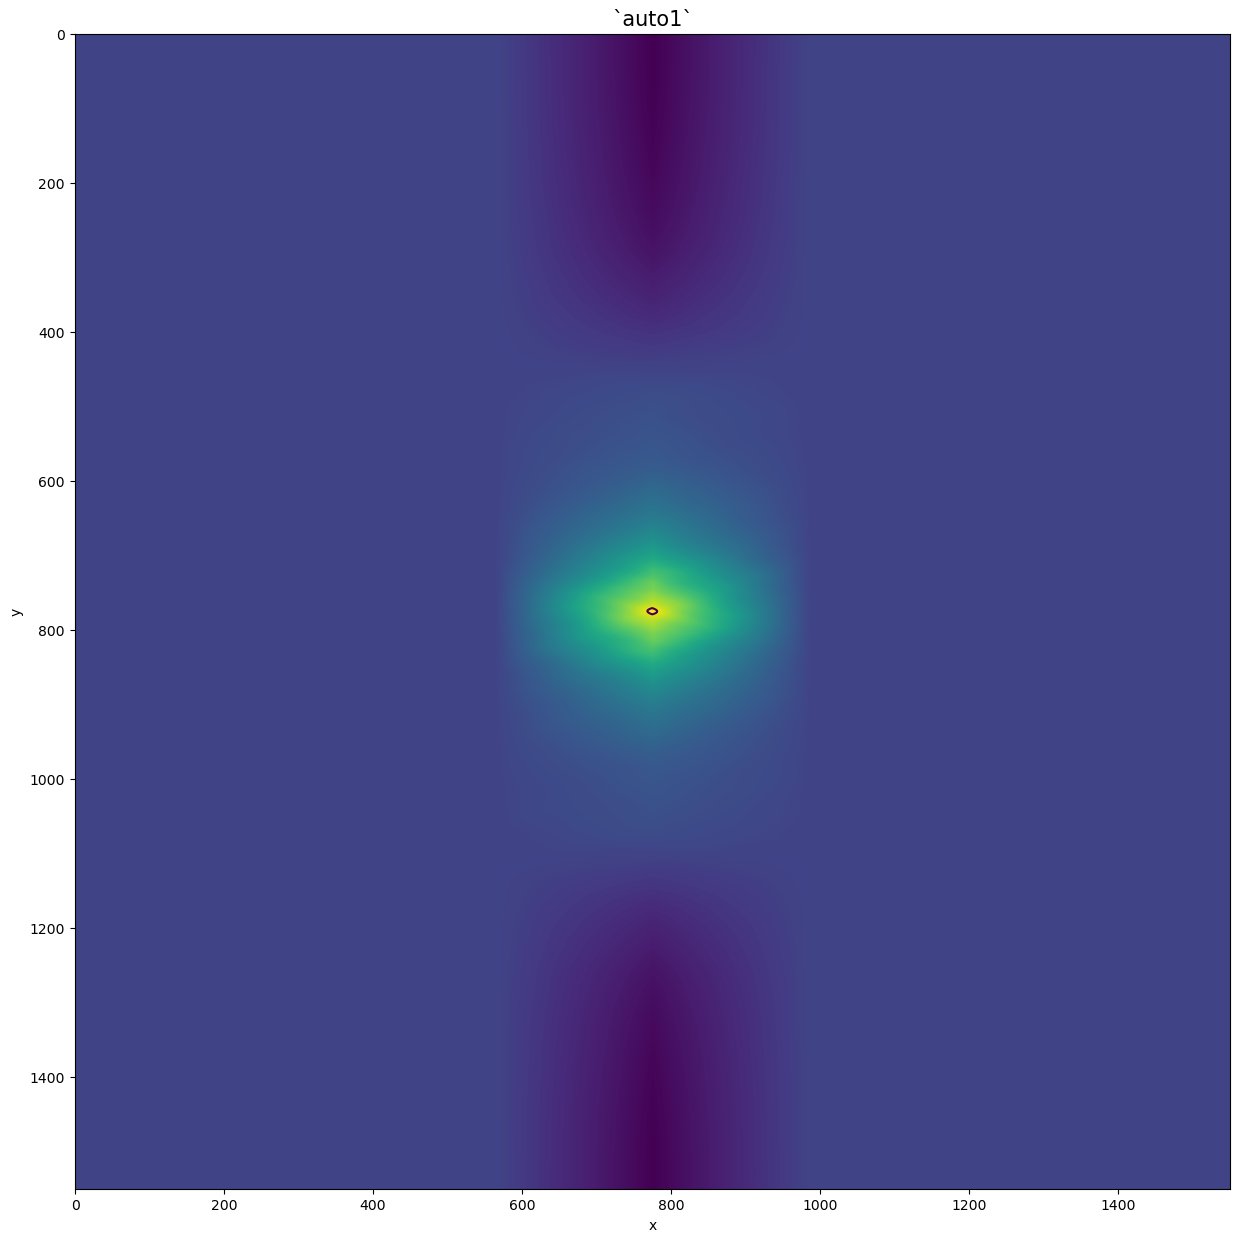

In [36]:
fcinf = 0.99

fig = plt.figure(figsize=(17, 15))

axe = fig.add_subplot(1, 1, 1)
axe.imshow(auto1)
axe.contour(auto1, [fcinf, 1.0])
axe.set_xlabel("x")
axe.set_ylabel("y")
axe.set_title("`auto1`", fontsize=15)
plt.show()

It is an almost perfect ellipsoid.

# Computing length versus angle